# 선형분류모델
- Logistic Regression (로지스틱회귀)
  - Regression이라고 하는 회귀 단어가 붙지만 <b>분류모델</b> ! ! 
- SVC(Support Vector Machine)

In [1]:
# 도구 불러오기
import pandas as pd

In [3]:
# 와인데이터 불러오기 
wine_data = pd.read_csv('data/wine.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# 데이터 확인
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
wine_data['color'].unique()
# 1: red wine
# 0: white wine

- 데이터 분리
  - 문제, 정답

In [5]:
# X ( color를 제외한 모든 컬럼 )
# y ( color 컬럼 )
X = wine_data.drop('color', axis=1)
y = wine_data['color']

In [6]:
# 훈련용 테스트용 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [7]:
# 크기확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4547, 12) (4547,)
(1950, 12) (1950,)


### 모델링

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression # 선형분류모델

In [18]:
# 모델 객체생성
logi_model = LogisticRegression(max_iter=5000)

# max_iter : 반복 횟수

In [19]:
# 모델 학습
logi_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [20]:
# 교차검증 (5번)
from sklearn.model_selection import cross_val_score

result = cross_val_score(logi_model, X_train, y_train, cv=5)
result.mean()

0.9824059768614225

In [22]:
# 평가
logi_model.score(X_test, y_test)

0.9876923076923076

In [23]:
# SVM 
from sklearn.svm import LinearSVC   #분류모델

In [24]:
svc_model = LinearSVC()

In [25]:
# 학습
svc_model.fit(X_train, y_train)

c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [27]:
# 교차검증
cross_val_score(svc_model, X_train, y_train, cv=5).mean()

c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-pa

0.9527327458020528

In [29]:
svc_model.score(X_test, y_test)

0.9846153846153847

### 분류평가지표
#### 재현율(Recall), 정밀도(Precision)
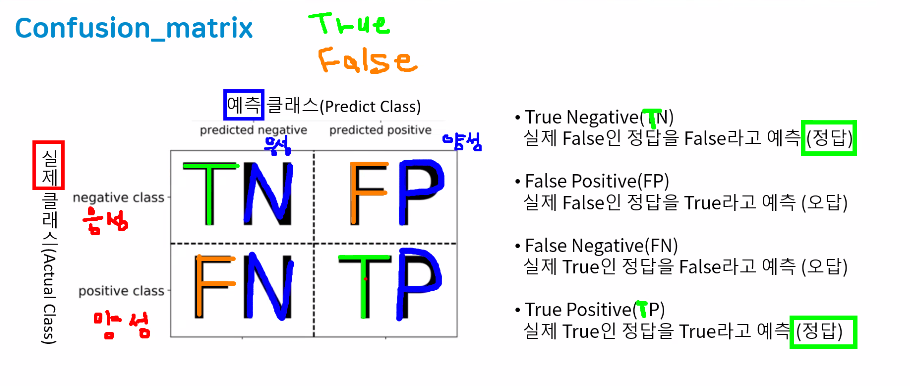
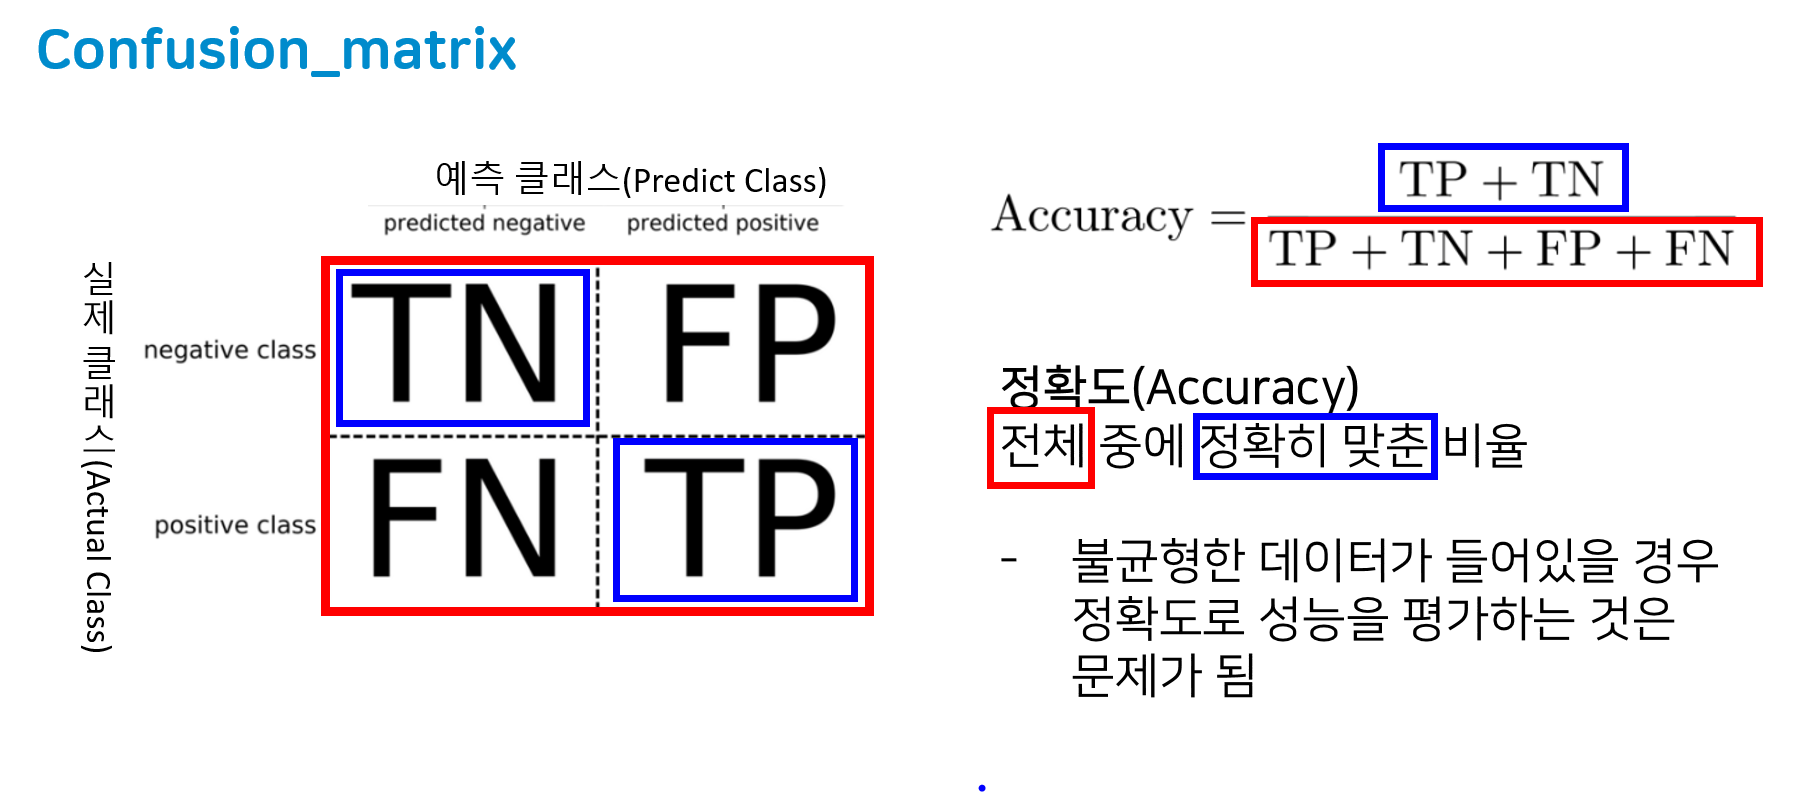
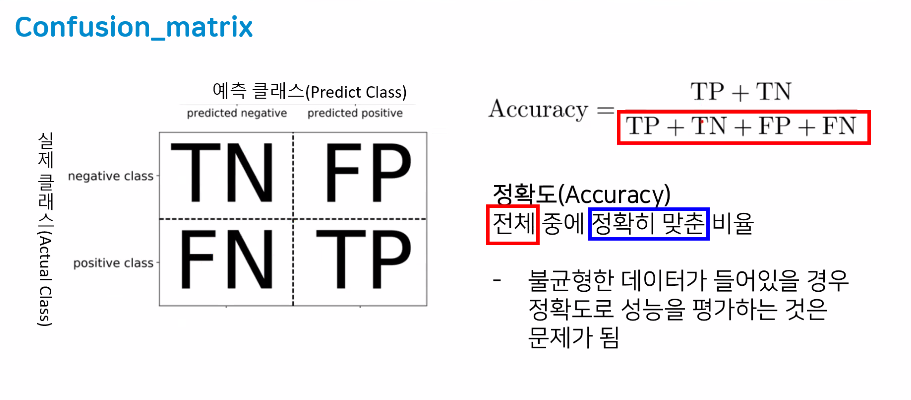
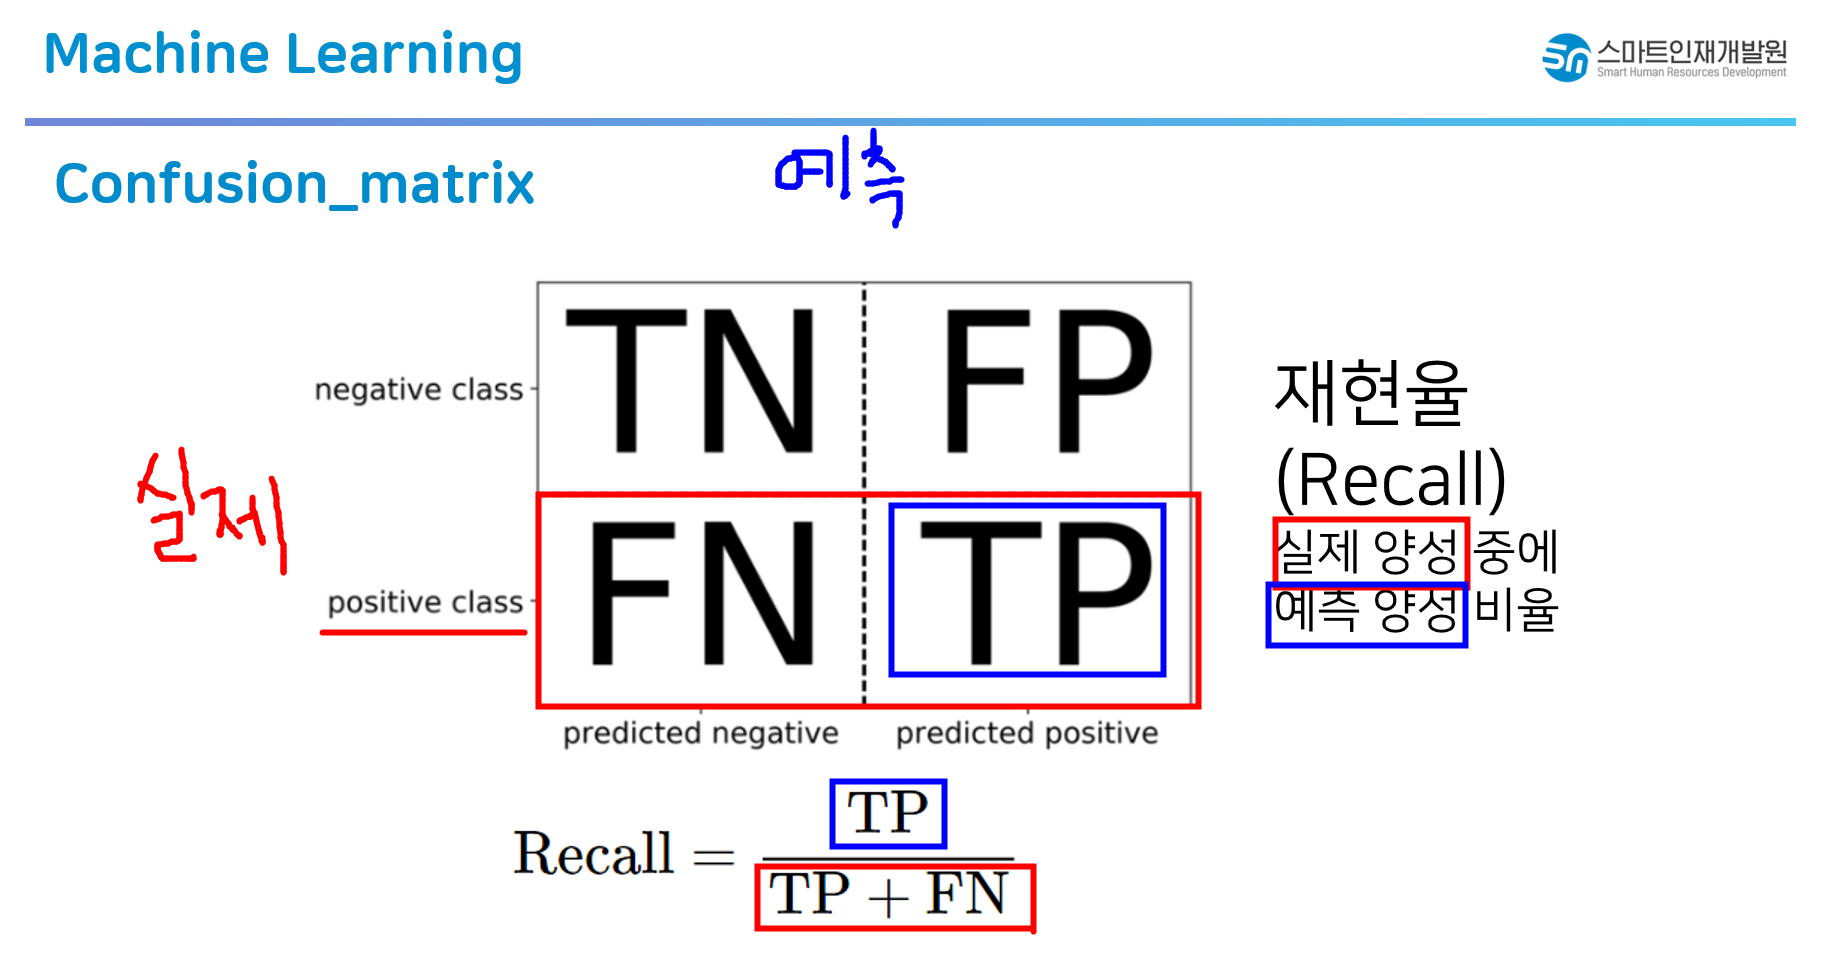
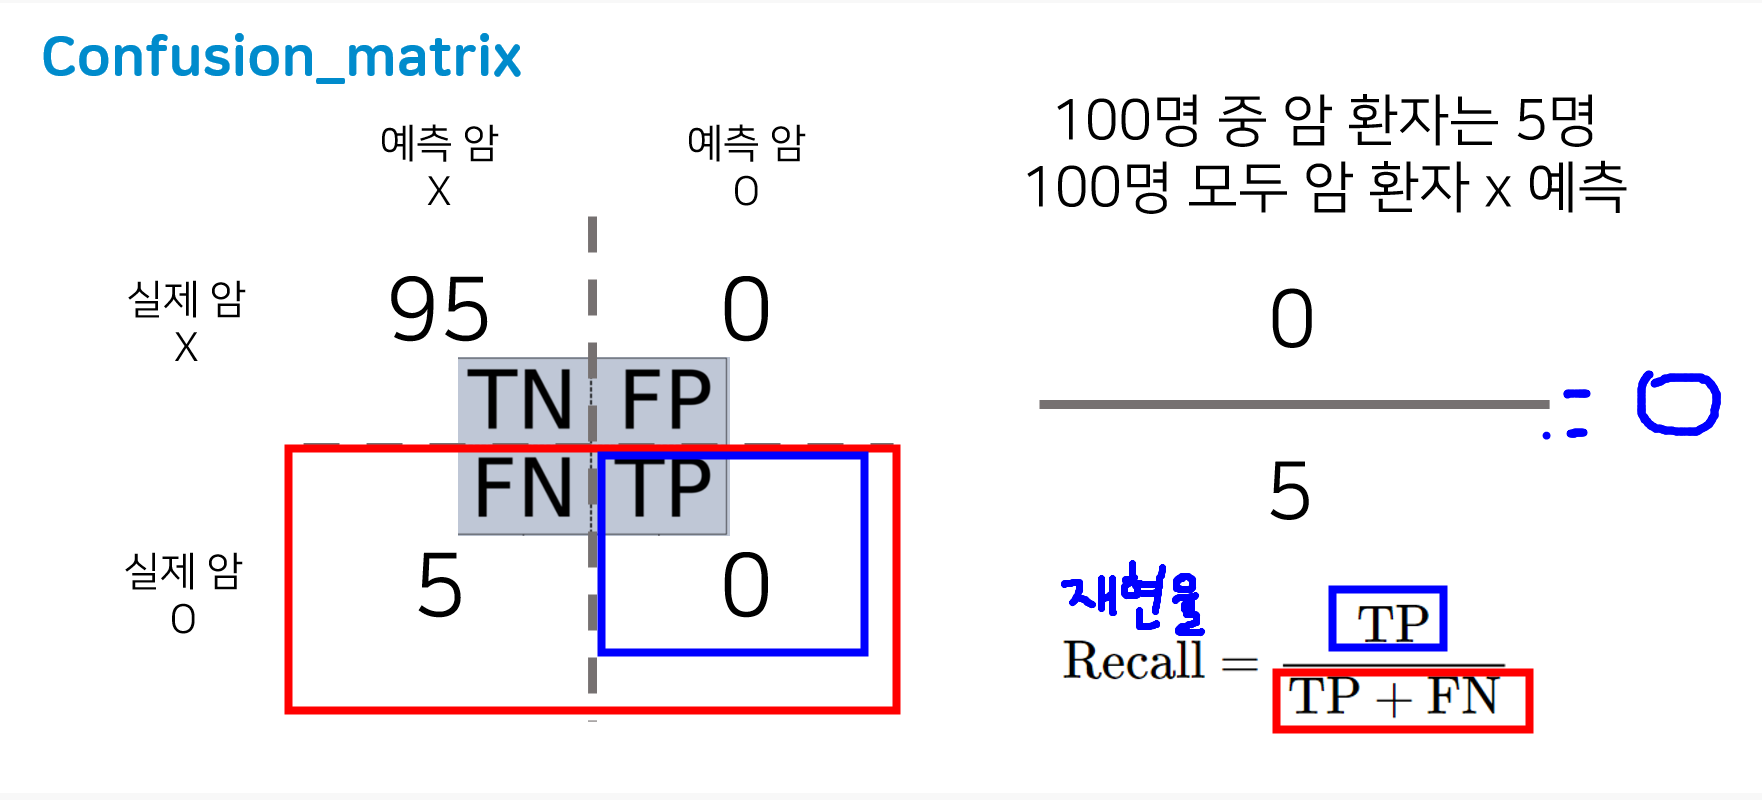
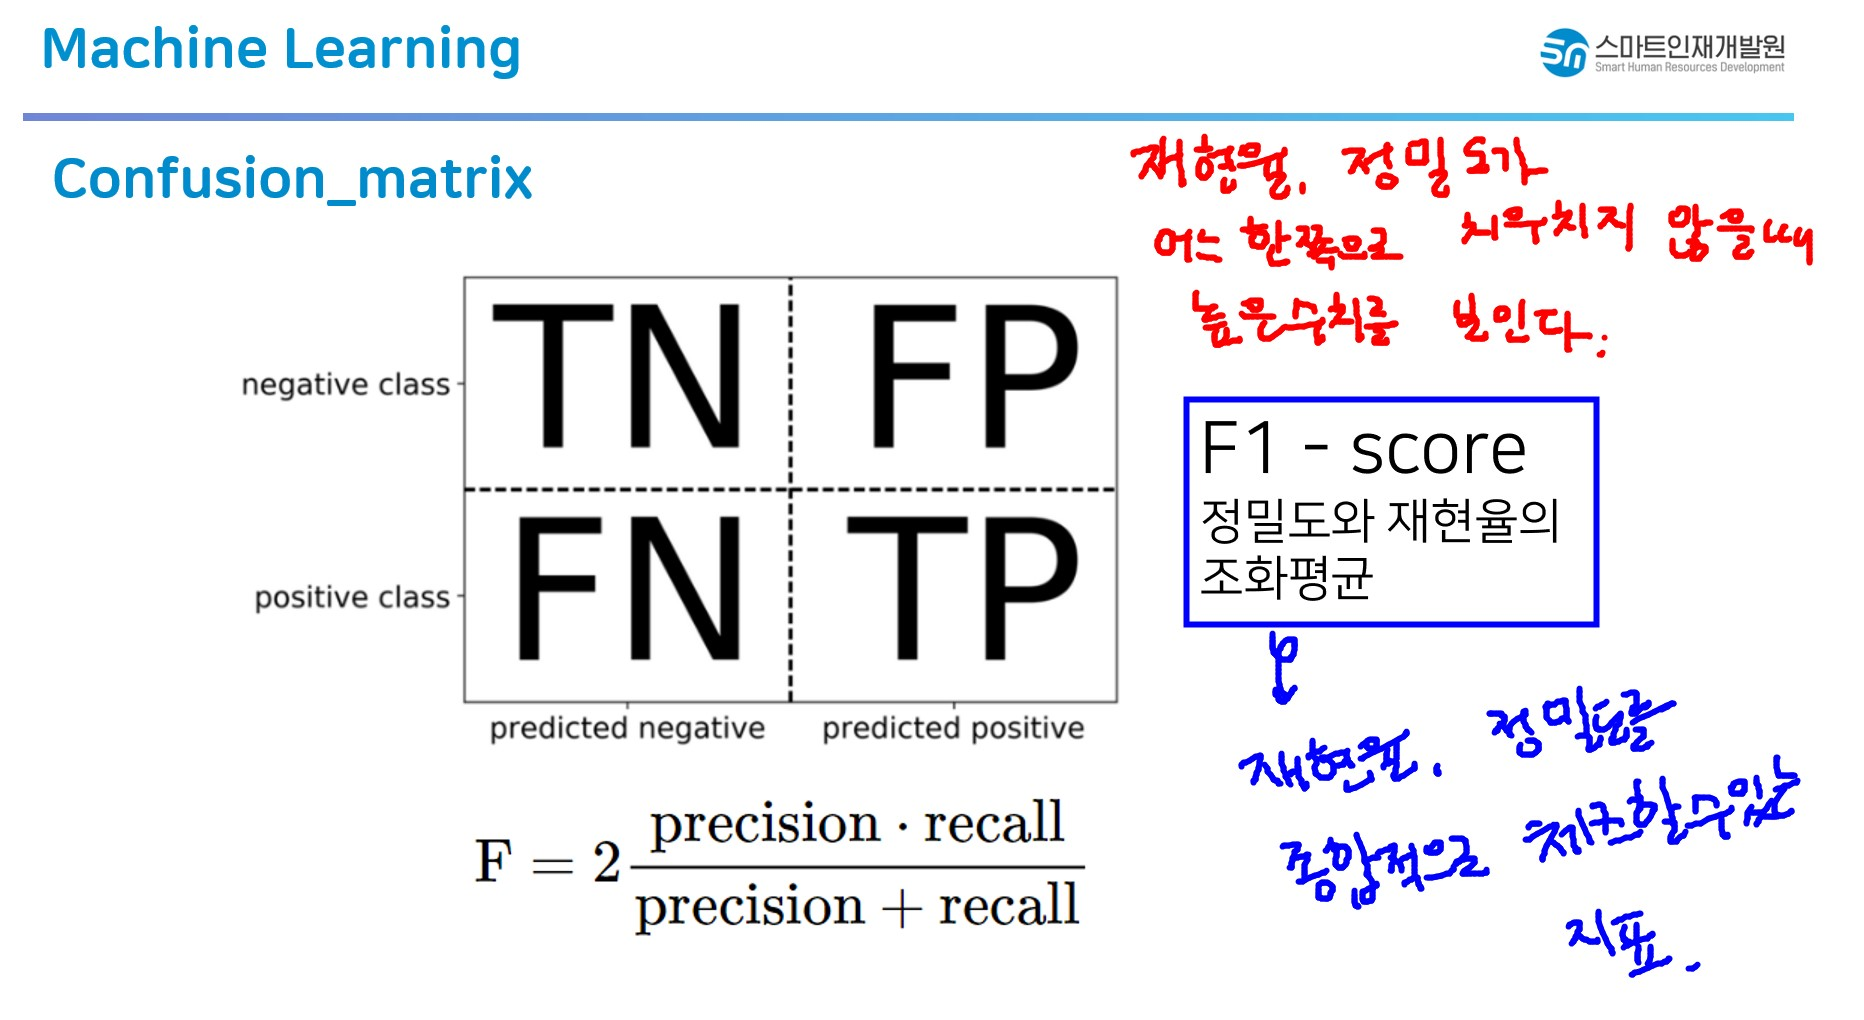
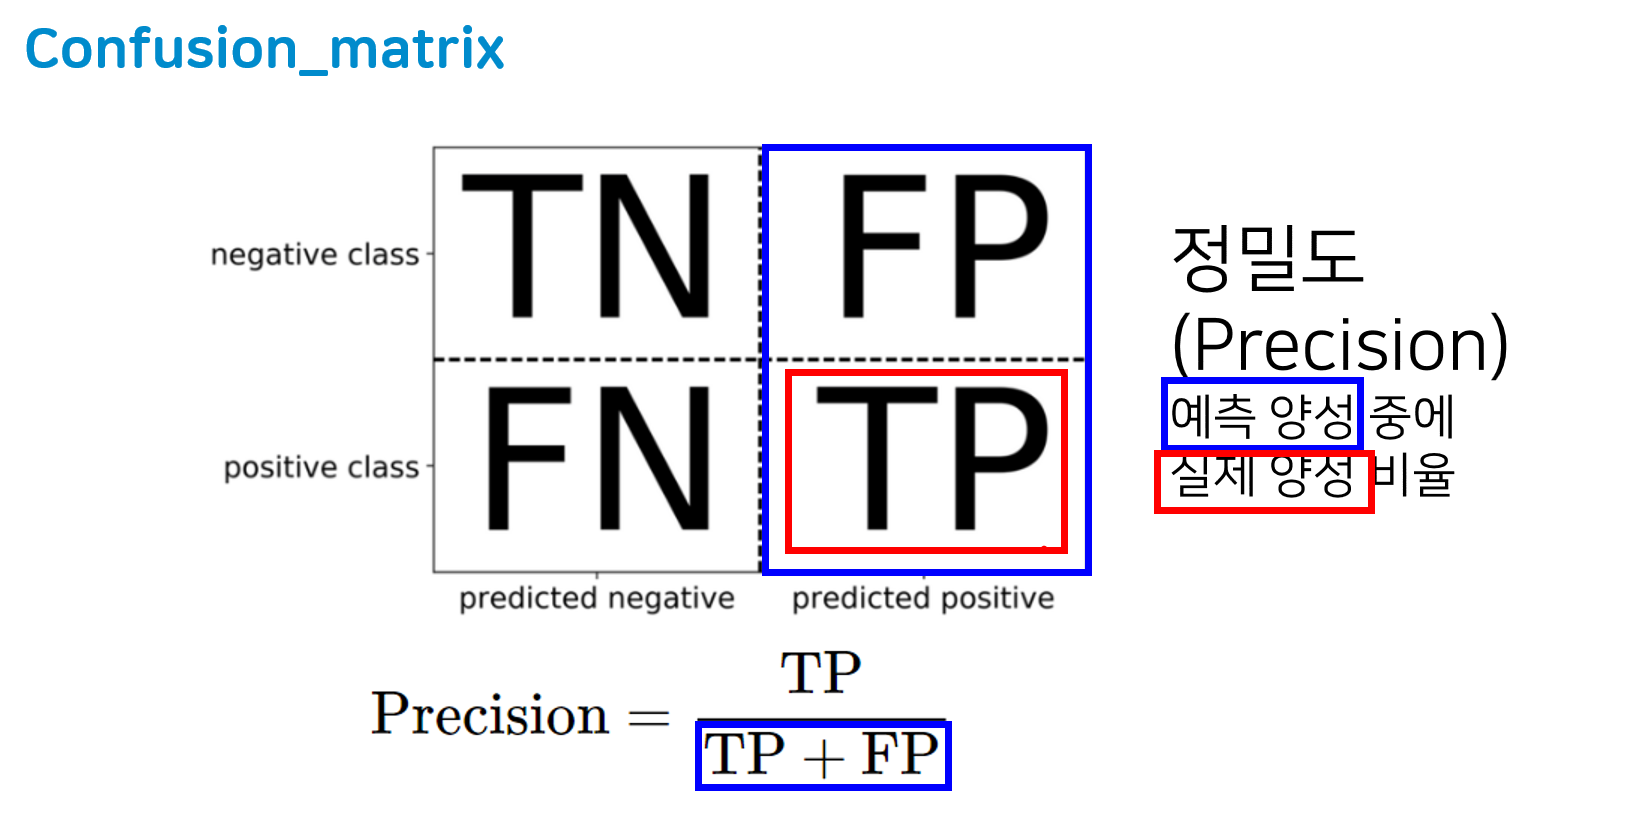
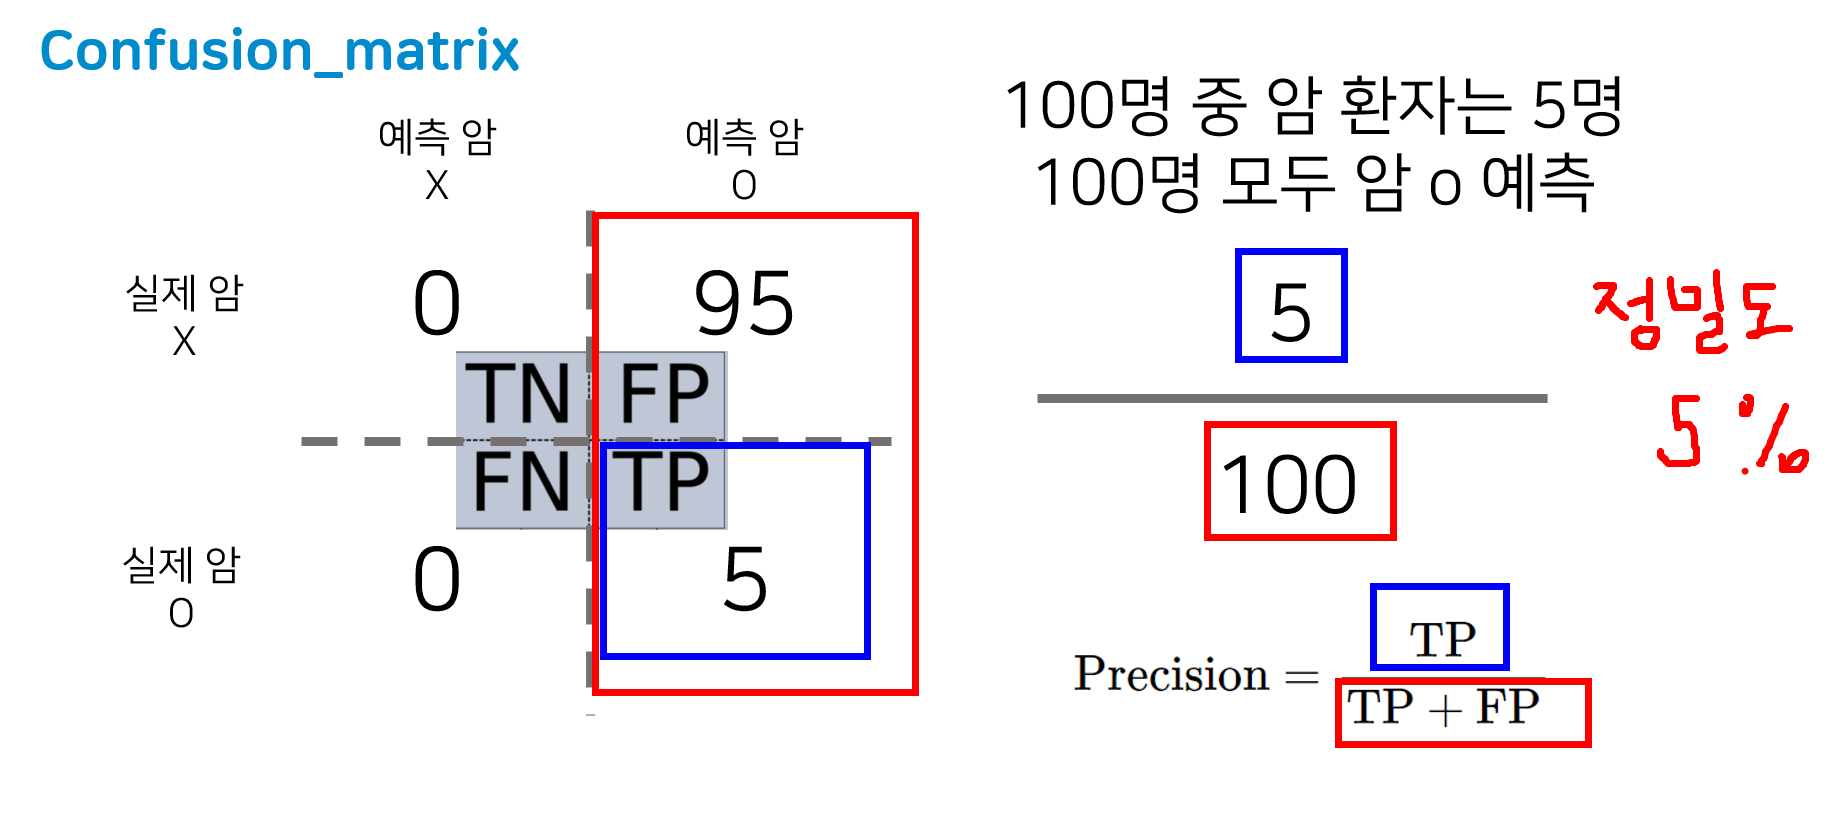
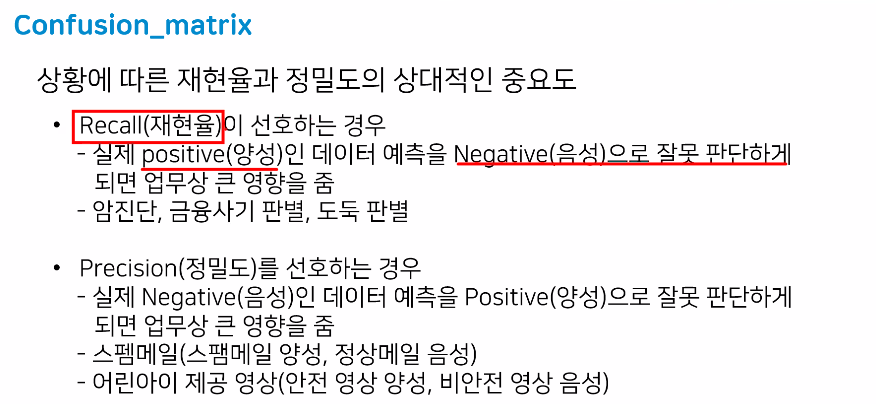
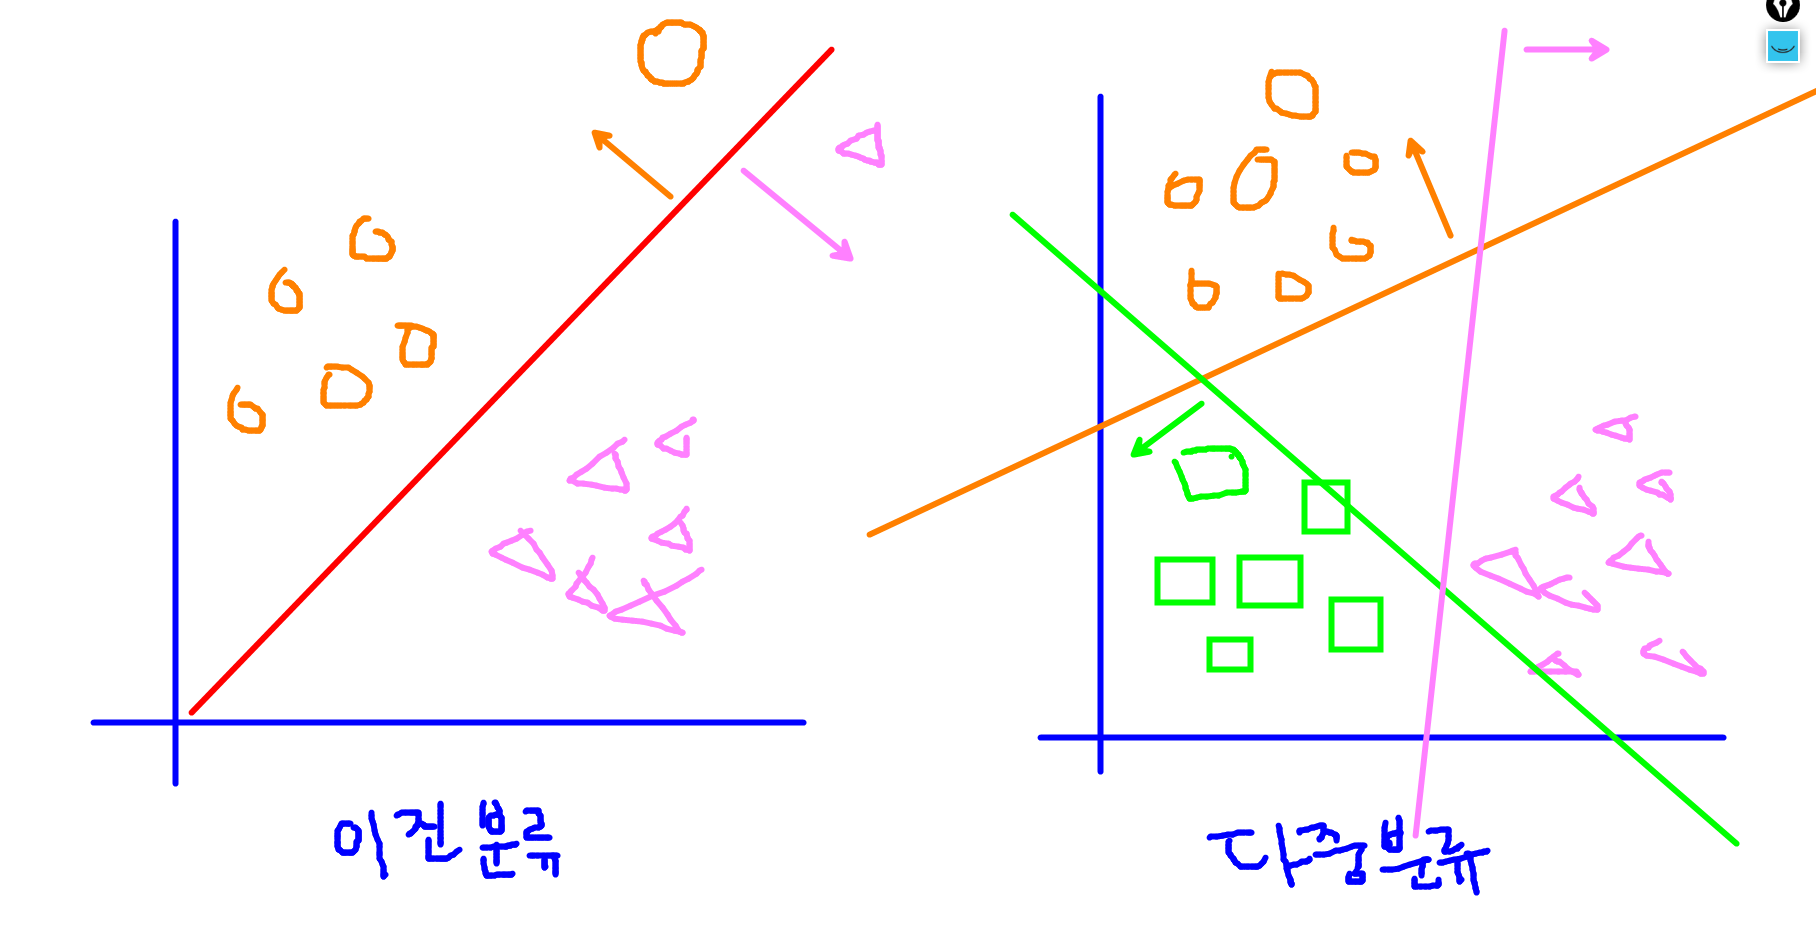

### 분류평가지표
- 정확도(accuracy)
  - 전체 데이터에 정확히 맞춘 비율
- 재현율(recall)
  - 실제 양성 중에서 예측 양성의 비율
- 정밀도(precision)
  - 예측 양성 중에서 실제 양성의 비율
- F1 score
  - 정밀도와 재현율의 조화평균
  - 어느 한쪽으로 치우치지 않을 때 높은 수치를 보인다 